<a href="https://colab.research.google.com/github/moonmehedi/deep-learning-note-books/blob/main/data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import commonly used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import cv2


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
if tf.test.is_gpu_available():
  print("gpu available")
else:
  print("gpu not here")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


gpu available


In [ ]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos.tar',origin=dataset_url,cache_dir='/content/sample_data',untar=True)

In [ ]:
data_dir=data_dir+"/flower_photos"

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/sample_data/datasets/flower_photos_extracted/flower_photos')

In [ ]:
image_count= len(list(data_dir.glob("*/*.jpg")))

image_count

3670

In [ ]:
#how to see the roses
roses=list(data_dir.glob("roses/*"))
roses

[PosixPath('/content/sample_data/datasets/flower_photos_extracted/flower_photos/roses/4809566219_88f9a1aea3.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos_extracted/flower_photos/roses/3265902330_d8b1e44545.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos_extracted/flower_photos/roses/3753920123_c7ebc18ee3.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos_extracted/flower_photos/roses/5419629292_2f06e4b295.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos_extracted/flower_photos/roses/15999816377_4b95e0b538_n.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos_extracted/flower_photos/roses/6864417932_36fa4ceecf_n.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos_extracted/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos_extracted/flower_photos/roses/4504731519_9a260b6607_n.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos_extracted/flow

In [ ]:
roses

[PosixPath('/content/sample_data/datasets/flower_photos_extracted/flower_photos/roses/4809566219_88f9a1aea3.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos_extracted/flower_photos/roses/3265902330_d8b1e44545.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos_extracted/flower_photos/roses/3753920123_c7ebc18ee3.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos_extracted/flower_photos/roses/5419629292_2f06e4b295.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos_extracted/flower_photos/roses/15999816377_4b95e0b538_n.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos_extracted/flower_photos/roses/6864417932_36fa4ceecf_n.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos_extracted/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos_extracted/flower_photos/roses/4504731519_9a260b6607_n.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos_extracted/flow

In [ ]:
flower_image_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}


In [ ]:
flower_image_dict['roses']

[PosixPath('/content/sample_data/datasets/flower_photos_extracted/flower_photos/roses/4809566219_88f9a1aea3.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos_extracted/flower_photos/roses/3265902330_d8b1e44545.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos_extracted/flower_photos/roses/3753920123_c7ebc18ee3.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos_extracted/flower_photos/roses/5419629292_2f06e4b295.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos_extracted/flower_photos/roses/15999816377_4b95e0b538_n.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos_extracted/flower_photos/roses/6864417932_36fa4ceecf_n.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos_extracted/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos_extracted/flower_photos/roses/4504731519_9a260b6607_n.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos_extracted/flow

In [ ]:
flower_label_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

array([[[252, 252, 252],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       [[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       [[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       ...,

       [[251, 251, 251],
        [251, 251, 251],
        [252, 252, 252],
        ...,
        [246, 248, 248],
        [246, 248, 248],
        [246, 248, 248]],

       [[252, 252, 252],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [246, 248, 248],
        [246, 248, 248],
        [246, 248, 248]],

       [[252, 252, 252],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [247, 249, 249],
        [247, 249, 249],
        [247, 249, 249]]], dtype=uint8)
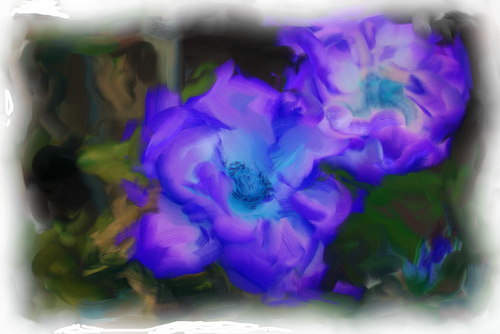

In [ ]:
img=cv2.imread(str(flower_image_dict['roses'][0]))
img

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
x,y=[],[]

for flower_name,images in flower_image_dict.items():
  print(flower_name)
  print(len(images))
  for image in images:
    img=cv2.imread(str(image))
    x.append(cv2.resize(img,(180,180)))
    y.append(flower_label_dict[flower_name])

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [ ]:
len(x),len(y),x[5],y[5]

(3670,
 3670,
 array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [254, 254, 254],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [254, 254, 254],
         ...,
         [254, 254, 254],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[254, 254, 254],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255,

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=.2)

In [ ]:
x_train,x_test

(array([[[[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
 
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
 
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
 
         ...,
 
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [254, 254, 254],
          [253, 253, 253],
          [254, 254, 254]],
 
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [252, 252, 252],
          [254, 254, 254],
          [255, 255, 255]],
 
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
   

In [ ]:
y_train,y_test

(array([1, 4, 0, ..., 2, 3, 3]),
 array([1, 0, 2, 4, 2, 3, 0, 4, 3, 4, 1, 3, 2, 3, 4, 2, 1, 1, 0, 2, 2, 2,
        1, 2, 3, 0, 2, 4, 4, 0, 4, 2, 2, 3, 1, 1, 2, 2, 4, 1, 4, 4, 4, 4,
        2, 3, 3, 3, 2, 1, 0, 0, 2, 4, 1, 2, 0, 3, 4, 4, 0, 2, 4, 4, 2, 3,
        2, 0, 4, 4, 2, 2, 2, 0, 1, 0, 4, 1, 2, 0, 4, 2, 3, 1, 1, 4, 2, 3,
        0, 2, 0, 2, 2, 4, 3, 3, 1, 0, 1, 3, 2, 2, 4, 0, 4, 2, 0, 1, 0, 0,
        1, 0, 3, 3, 4, 3, 0, 0, 1, 0, 0, 1, 0, 4, 1, 2, 2, 0, 4, 2, 3, 0,
        4, 1, 0, 1, 3, 4, 3, 3, 3, 0, 4, 0, 2, 1, 0, 3, 2, 2, 4, 2, 0, 2,
        0, 1, 4, 2, 2, 0, 3, 0, 1, 4, 0, 3, 0, 1, 4, 0, 4, 4, 0, 0, 0, 4,
        3, 1, 4, 3, 2, 2, 4, 1, 1, 4, 2, 2, 2, 2, 4, 3, 2, 1, 4, 4, 2, 4,
        3, 2, 4, 2, 2, 4, 4, 0, 2, 2, 4, 0, 3, 3, 2, 3, 0, 1, 0, 0, 0, 4,
        0, 2, 2, 4, 1, 2, 1, 2, 3, 3, 0, 1, 0, 3, 2, 2, 1, 3, 3, 4, 4, 4,
        2, 3, 2, 0, 0, 0, 4, 3, 4, 0, 0, 2, 0, 3, 0, 1, 0, 2, 2, 1, 3, 4,
        1, 0, 2, 1, 3, 0, 4, 2, 4, 1, 4, 0, 0, 1, 2, 0, 0, 3, 3, 4, 1, 4,
     

In [ ]:
len(x_train)

2936

In [ ]:
len(x_test)

734

In [ ]:
#scaled

x_train_scaled=x_train/255
x_test_scaled=x_test/255

x_train_scaled,x_test_scaled

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [ ]:
len(flower_label_dict)

5

In [ ]:

model=Sequential(
    [
        #CNN
        layers.Conv2D(16,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),


        #ANN
        layers.Dense(128,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(len(flower_label_dict),activation='softmax')

    ]
)



model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True ),metrics=['accuracy'])

model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.3456 - loss: 1.4485
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6149 - loss: 1.0132
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6513 - loss: 0.8758
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7574 - loss: 0.6474
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8149 - loss: 0.4937
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9046 - loss: 0.2791
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9654 - loss: 0.1300
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9837 - loss: 0.0657
Epoch 9/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9879 - loss: 0.0511
Epoch 10/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9886 - loss: 0.0487


In [ ]:
model.evaluate(x_test_scaled,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6383 - loss: 2.0070


[2.0254201889038086, 0.6307901740074158]

In [ ]:
data_augmentation= keras.Sequential(
    [
        layers.RandomFlip("horizontal",input_shape=(180,180,3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
input_img = np.random.random((32, 224, 224, 3))
layer = keras.layers.RandomZoom(.5, .2)
out_img = layer(input_img)



In [ ]:
type(data_augmentation)

keras.src.models.sequential.Sequential

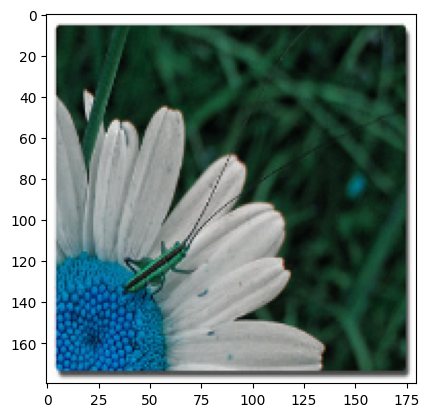

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train_scaled.shape

(2936, 180, 180, 3)

In [ ]:
data_augmentation(x_train)

<tf.Tensor: shape=(2936, 180, 180, 3), dtype=float32, numpy=
array([[[[2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         ...,
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02]],

        [[2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         ...,
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02]],

        [[2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         ...,
        

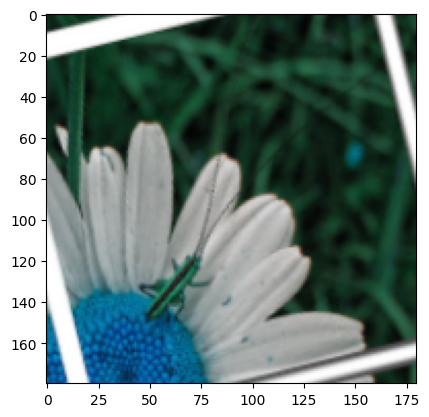

In [ ]:
plt.imshow(data_augmentation(x_train_scaled)[0])

In [ ]:
model2=Sequential([

    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),


    #ann
    layers.Dropout(.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),

    layers.Dense(len(flower_label_dict)),
])

model2.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

model2.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.3563 - loss: 1.4347
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.5696 - loss: 1.0642
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6369 - loss: 0.9170
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6857 - loss: 0.8227
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.6993 - loss: 0.7923
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7134 - loss: 0.7454
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7396 - loss: 0.6898
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7325 - loss: 0.6964
Epoch 9/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7506 - loss: 0.6648
Epoch 10/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7552 - loss: 0.6474
Epoch 11/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7710 - loss: 0.5929
Epoch 12/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy:

In [ ]:
model2.evaluate(x_test_scaled,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7238 - loss: 0.9295


[1.0066381692886353, 0.7029972672462463]